# NB3: Phylogeny: species tree 

The data sets used in this notebook were generated with ipyrad (see [notebook here]()). You can re-create the data sets used here by running that notebook. 

### Table of contents
[Software installation (conda)](#Required-software)  
[Phylogenetic analysis (tetrad)](#Analysis-RAxML)  
[Tree plots (toytree)](#Tree plot)



## Required software
All software required for this notebook can be installed locally using *conda*. 

In [1]:
## conda install toytree   -c eaton-lab
## conda install ipyrad    -c ipyrad 

In [1]:
## import packages
import ipyrad as ip
import ipyrad.analysis as ipa
import toytree

## print ipyrad info
print "ipyrad v.{}".format(ip.__version__)

ipyrad v.0.6.20


## Cluster setup
We will distribute jobs across an HPC cluster using the ipyparallel library (which is installed as a dependency of ipyrad). Start an ipcluster instance and check your connection below.  

In [2]:
## print ipyparallel cluster information
import ipyparallel as ipp
ipyclient = ipp.Client()
#print ip.cluster_info(ipyclient)

### A function to select samples from clades
For a given data set this function returns the samples in it that are from the selected clade. 

In [3]:
def get_subsample_names(data, clade):
    ## known clades
    c1 = ["tonduzii", "maxima", "yoponens", "glabrata", "insipida"]
    c2 = ["nymph", "obtus", "pope", "bull", "citri", "paraen",
          "pertus", "perfor", "dugan", "turbin", "colub", 
          "costa", "tria", "trig"]
    
    ## select clades from a dict
    clades={
        "pharmacosycea": c1,
        "americana": c2,
    }
    
    ## return selected clade names
    keys = data.samples.keys()
    names = [i for i in keys if any([bit in i for bit in clades[clade]])]
    return names

### Data sets

We will use three data sets that were created already. One "full" data set and two subsampled data sets.  

In [4]:
## the full large data set
full = ip.load_json("analysis-ipyrad/ficus_dhi_s4.json")

## pharma subsampled data set
pharma = full.branch("pharma_dhi_s4", 
                     subsamples=get_subsample_names(full, "pharmacosycea"))
pharma.set_params("min_samples_locus", 4)
pharma.run("7", force=True)

## americana subsampled data set
america = full.branch("america_dhi_s4", 
                     subsamples=get_subsample_names(full, "americana"))
america.set_params("min_samples_locus", 4)
america.run("7", force=True)                    

  loading Assembly: ficus_dhi_s4
  from saved path: ~/Documents/Ficus/analysis-ipyrad/ficus_dhi_s4.json

  Assembly: pharma_dhi_s4
  [####################] 100%  filtering loci        | 0:00:17 | s7 | 
  [####################] 100%  building loci/stats   | 0:00:35 | s7 | 
  [####################] 100%  building alleles      | 0:00:40 | s7 | 
  [####################] 100%  building vcf file     | 0:00:51 | s7 | 
  [####################] 100%  writing vcf file      | 0:00:00 | s7 | 
  [####################] 100%  building arrays       | 0:00:14 | s7 | 
  [####################] 100%  writing outfiles      | 0:00:14 | s7 | 
  Outfiles written to: ~/Documents/Ficus/analysis-ipyrad/pharma_dhi_s4_outfiles

  Assembly: america_dhi_s4
  [####################] 100%  filtering loci        | 0:00:36 | s7 | 
  [####################] 100%  building loci/stats   | 0:00:37 | s7 | 
  [####################] 100%  building alleles      | 0:00:45 | s7 | 
  [####################] 100%  building vcf file   

In [5]:
full = ip.load_json("analysis-ipyrad/ficus_dhi_s4.json")
pharma = ip.load_json("analysis-ipyrad/pharma_dhi_s4.json")
america = ip.load_json("analysis-ipyrad/america_dhi_s4.json")

  loading Assembly: ficus_dhi_s4
  from saved path: ~/Documents/Ficus/analysis-ipyrad/ficus_dhi_s4.json
  loading Assembly: pharma_dhi_s4
  from saved path: ~/Documents/Ficus/analysis-ipyrad/pharma_dhi_s4.json
  loading Assembly: america_dhi_s4
  from saved path: ~/Documents/Ficus/analysis-ipyrad/america_dhi_s4.json


### Analysis `tetrad`
(Inference by phylogenetic invariants within quartets)

In [6]:
## create tetrad object
fulltet = ipa.tetrad(
    full.name,
    seqfile=full.outfiles.snpsphy, 
    mapfile=full.outfiles.snpsmap,
    workdir="analysis-tetrad", 
    nboots=100,
    );

pharmatet = ipa.tetrad(
    pharma.name,
    seqfile=pharma.outfiles.snpsphy, 
    mapfile=pharma.outfiles.snpsmap,
    workdir="analysis-tetrad", 
    nboots=100,
    );

americatet = ipa.tetrad(
    america.name,
    seqfile=america.outfiles.snpsphy, 
    mapfile=america.outfiles.snpsmap,
    workdir="analysis-tetrad", 
    nboots=100,
    );


loading seq array [76 taxa x 547987 bp]
max unlinked SNPs per quartet (nloci): 76904
loading seq array [23 taxa x 143884 bp]
max unlinked SNPs per quartet (nloci): 41432
loading seq array [53 taxa x 361100 bp]
max unlinked SNPs per quartet (nloci): 56067


### Run it

In [ ]:
pharmatet.run(force=True, ipyclient=ipyclient)

In [ ]:
americatet.run(ipyclient=ipyclient)

In [ ]:
fulltet.run(ipyclient=ipyclient)

## Plot trees

In [4]:
import numpy as np
import toytree
import toyplot
import toyplot.pdf

In [11]:
tre = toytree.tree("analysis-tetrad/pharma_dhi_s4.cons")
#tre.root(wildcard="insip")
tre.draw(
    width=300,
    height=700,
    node_labels=tre.get_node_values("support"),
    );

A96_glabrata B131_glabrataXmaxima A97_glabrata B134_glabrata B133_glabrata B130_glabrataXmaxima C50_insipida B128_insipida C15_insipida B126_insipida A95_insipida B127_insipida C48_tonduzii B123_maxima C45_yoponensis C47_yoponensis C46_yoponensis C18_maxima B120_maxima B119_maxima B118_maxima C17_maxima A94_maxima 100 100 99 58 100 100 28 14 17 38 100 100 100 100 53 100 93 86 48 70 
 
 
 Save as .csv

## OTHER STUFF

### Looking at raw data on tree

In [126]:
data = ip.load_json("analysis-ipyrad/ficus_dlo.json", 1)

## draw scatterplot
c, a, m = toyplot.scatterplot(
    data.stats.reads_raw, 
    data.stats.reads_consens,
    width=300, height=300,
    size=8,
    mstyle={"fill": "#262626", "stroke": "#262626", "opacity": 0.8},
    title=data.stats.index.tolist(),
    )

## modify axes
a.y.label.text = "N consensus reads (x 1e3)"
a.y.ticks.show = True
a.y.ticks.locator = toyplot.locator.Explicit(
    locations = range(0, int(240e3), int(40e3)),
    labels = range(0, 240, 40),
    )
a.x.label.text = "N raw reads (x 1e6)"
a.x.ticks.show = True
a.x.ticks.locator = toyplot.locator.Explicit(
    locations = range(0, int(60e6), int(10e6)),
    labels = range(0, 6),
    )



  loading Assembly: ficus_dlo
  from saved path: ~/Documents/Ficus/analysis-ipyrad/ficus_dlo.json


A01_paraensis A02_paraensis A04_paraensis A05_paraensis A06_obtusifolia A07_obtusifolia A16_citrifolia A18_citrifolia A19_citrifolia A26_popenoei A27_popenoei A28_popenoei A29_popenoei A33_nymphaeifolia A34_nymphaeifolia A38_nymphaeifolia A41_nymphaeifolia A42_nymphaeifolia A48_trigonata A49_trigonata A55_triangle A59_dugandii A60_dugandii A61_turbinata A62_turbinata A63_turbinata A65_pertusa A67_bullenei A69_bullenei A70_bullenei A71_bullenei A72_bullenei A75_colubrinae A77_colubrinae A82_perforata A83_perforata A84_perforata A85_perforata A87_costaricana A94_maxima A95_insipida A96_glabrata A97_glabrata B102_obtusifolia B103_obtusifolia B118_maxima B119_maxima B120_maxima B123_maxima B126_insipida B127_insipida B128_insipida B130_glabrataXmaxima B131_glabrataXmaxima B133_glabrata B134_glabrata C01_bullenei C02_citrifolia C04_colubrinae C09_costaricana C11_costaricana C12_dugandii C14_dugandii C15_insipida C17_maxima C18_maxima C19_nymphaeifolia C21_obtusifolia C22_obtusifolia C24_obtusifolia C25_popenoei C26_popenoei C27_popenoei C28_pertusa C30_triangle C31_triangle C32_triangleXtrigonata C33_triangle C34_triangle C36_trigonata C37_trigonata C39_trigonata C41_trigonata C43_trigonata C45_yoponensis C46_yoponensis C47_yoponensis C48_tonduzii C49_dugandii C50_insipida C51_perforata C52_citrifolia C53_citrifolia C54_citrifolia C5_colubrinae 0 1 2 3 4 5 N raw reads (x 1e6) 0 40 80 120 160 200 N consensus reads (x 1e3) 
 
 
 Save as .csv

  loading Assembly: lodepth_min4
  from saved path: ~/Documents/Ficus/analysis-ipyrad/lodepth_min4.json


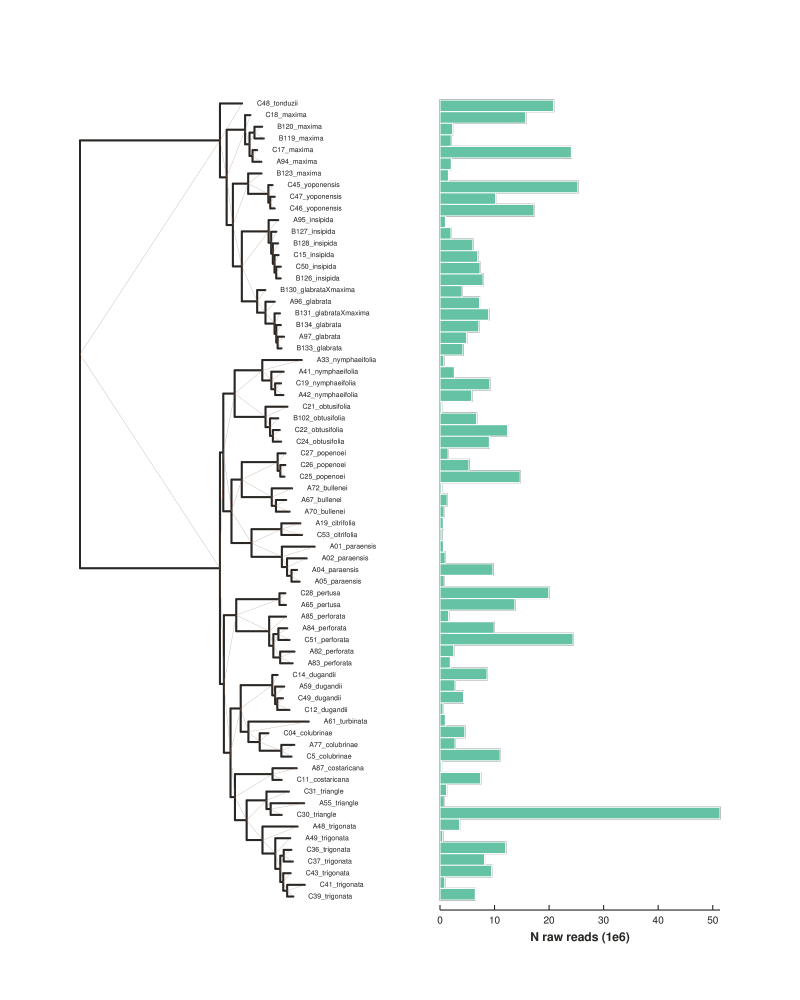

In [126]:
## load tree data
#tre = toytree.tree("analysis-tetrad/ficus_85d6f2_min4_s3K.tree")
newick="analysis_raxml/RAxML_bipartitions.ficus_c85d6f2_min4_s3K"
tre = toytree.tree(newick, format=0)

## load ipyrad data 
data = ip.load_json("analysis-ipyrad/lodepth_min4.json")
heights = data.stats.reads_raw.ix[tre.get_tip_labels()]
hdata = heights/float(1e6) 
hover = ["{}: {}".format(hdata.index[i], hdata[i]) for \
         i in range(hdata.shape[0])[::-1]]

## plot tree
canvas = toyplot.Canvas(    
    width=800, 
    height=1000,
    )
ax1 = canvas.cartesian(bounds=("10%", "50%", "10%", "90%"))
ax2 = canvas.cartesian(bounds=("55%", "90%", "10%", "90%"))

tre.draw(
    axes=ax1,
    #node_labels=True,
    node_size=5,
    use_edge_lengths=True,
    tip_labels_style={"font-size": "7px"}
    );

## add barplot
ax2.bars(hdata[::-1], 
         along='y', 
         title=hover,
         )

## style axes
ax1.show = False
ax2.y.show = False
ax2.x.label.text = "N raw reads (1e6)"
ax2.x.ticks.show = True

## save the plot and render in notebook
toyplot.pdf.render(canvas, "Tree_w_N_raw_Ficus_lodepth_min_4.pdf")
canvas